# Capstone Project - Telco Customer Churn Prediction

## Introduction
Customer churn means that the customer has churned. In this scenerio, churn means the customer has unsubcribed or canceled using the service. Customer churn is an important factor for a growing business, it will tell you about how your business is doing and if the customer are statisfied with the service provided. Knowing the churn rate is crucial because this will enable the company representatives to take decisions for retaining the customer from further churning in a cost efficient mannor. 

In this project I will predict if the customer is about to leave the services provided by the company using data analysis and machine learning. For this, the dataset used is of a telecom company (link - <href>https://www.kaggle.com/blastchar/telco-customer-churn</href>).


In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"/Users/ajinkyadande/Documents/ShubhCapstone_Telco_customer_chrun.csv")

## Data Overview and Cleaning

After importing the dataset, I wanted to understand how the data is distributed and the features it contains. This is a supervied dataset as we have the churn value associated with each customer already present in dataset. It consists of 7043 rows (i.e enteries) and 21 columns (i.e features). It tells us about the type of service they are using like phone or internet service, payments methods, thier monthly charges, whether they have partner or dependents etc. 

It is important to understand what data type each column represent. If the data type is not correct then we have to change it. So we can see that the column TotalCharges is of object type, this needs to be changed in numeric for further analysis.

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#find unique number
len(data.customerID.unique())

7043

In [5]:
#change totalcharge data type

data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors= 'coerce')

In [6]:
#check null
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#drop null
data= data.dropna()

In [8]:
#recheck null
data.isnull().sum()
#data.dtypes

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Data Exploration

After looking into the dataset, I explored it further by creating multiple visualizations. This was done using matplotlib and seaborn libraries. 
In this section I created visualizations of various columns to identify the trends in dataset for analysis. 

In [10]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [11]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

### Churn

The below graph shows that the customer that are churing is more than one third of the customer that are not churing, churn rate is about 27%. The count of customer who did not churn is 5163 as compared to those who churned 1869. 

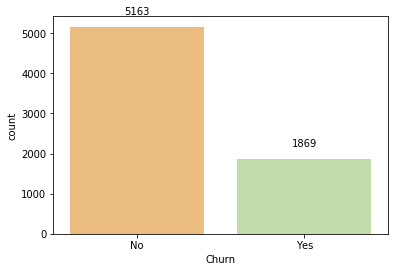

In [12]:
#graph of chrun
g=sns.countplot(data['Churn'], palette = 'Spectral')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')

In [13]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

### Payment Method

The payment can be done using 4 different ways - elctronic, mailed check, bank transfer, credit card. Largest payment recieved to the company is through electronic check with 2365 count. The second graph represents the distribustion of churn with respect to payment methods.

It is observed from the graph that the churn rate is high in electronic check at around 15% of the count. 

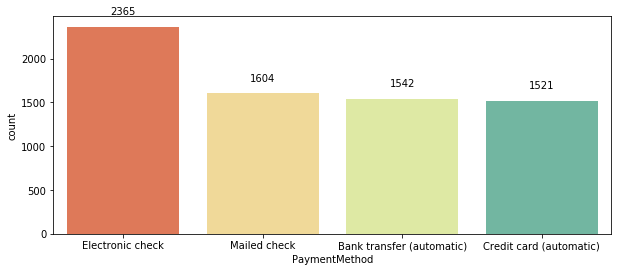

In [14]:
# graph of payment method
plt.figure(figsize=(10,4))
pm= sns.countplot(data['PaymentMethod'], palette = 'Spectral')

for p in pm.patches:
    pm.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')

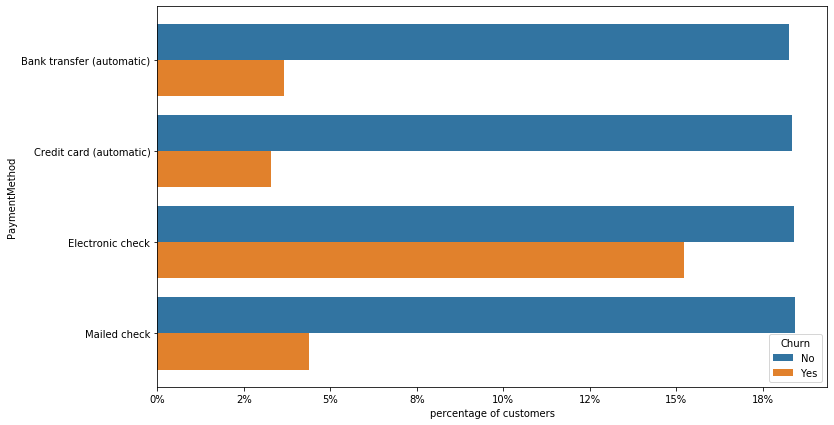

In [15]:
plt.figure(figsize=(12,7))
barplot_percentages("PaymentMethod", orient="h")

### Senior Citizen

Senior Citizens contributes to only 16% of customers, however, they have significantly higher churn rate counting to 7%, almost half of their population. The non senior citizen are about 64% and the churn rate is 20% which is one third of their population. 

The second graph is combination of sex, gender and churn rate, we can see that the gender does not play important role in churn. In both senior and non senior citizen the churn with respect to gender is almost same. 

In [16]:
data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

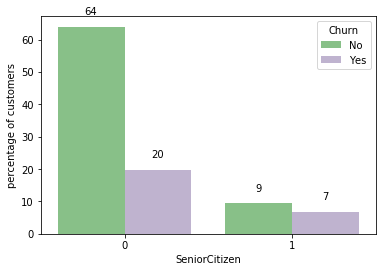

In [17]:
axis_y = "percentage of customers"

gp_partner = data.groupby('SeniorCitizen')["Churn"].value_counts()*100/len(data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SeniorCitizen', y= axis_y, data=gp_partner, hue='Churn', palette= 'Accent')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')

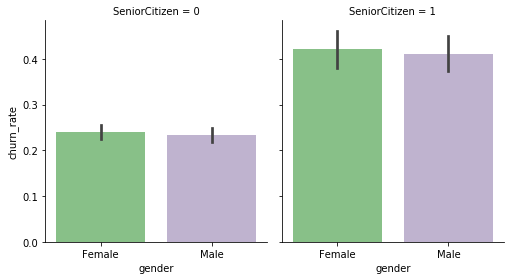

In [18]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Accent", order= ['Female', 'Male'])

### Partner
Customers that don't have partners are more likely to churn as represented in the following graph.


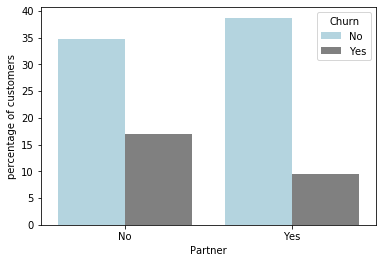

In [19]:
axis_y = "percentage of customers"
colors= ['lightblue','grey']
customPalette = sns.set_palette(sns.color_palette(colors))

gp_partner = data.groupby('Partner')["Churn"].value_counts()*100/len(data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, data=gp_partner, hue='Churn')

### Dependents

Customers that don't have dependents are more likely to churn as represented in the following graph.


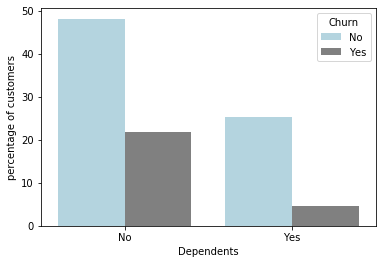

In [20]:
axis_y = "percentage of customers"
# colors= ['Set1']
# customPalette = sns.set_palette(sns.color_palette(colors))

gp_dep = data.groupby('Dependents')["Churn"].value_counts()*100/len(data)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep)

### Internet Service

The column of internet service has 3 different segement- <b>DSL, Fiber optic</b> and <b>No internet service</b>. Majority of the customer are using fiber optic service. There are about 22% of customer who do not use the internet service. 

The subsequent pie graph shows the distribution of customer with respect to segement and the bar graph represent the percentage of customer churning in each segment. From the graphs it is observed that customers with fiber optic service are more likely to churn.

In [21]:
data.groupby('InternetService').size()

InternetService
DSL            2416
Fiber optic    3096
No             1520
dtype: int64

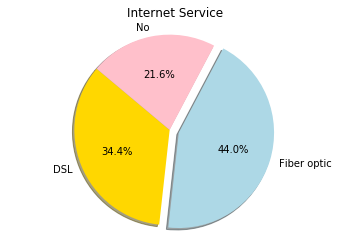

In [22]:
labels = 'DSL', 'Fiber optic', 'No'
sizes = [2416, 3096, 1520]
colors = ['gold', 'lightblue', 'pink']
explode = (0, 0.1, 0)

# Plot
plt.pie(sizes, explode= explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Internet Service')
plt.axis('equal')
plt.show()

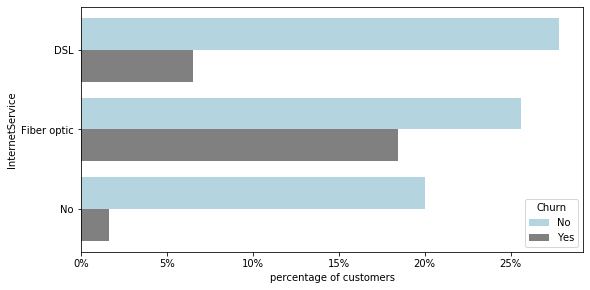

In [23]:

plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

### Customer Distribution
The following set of pie chart represents the percentage of customer in the following 4 categories- Gender, Partner, Dependetns, Senior Citizen

In [24]:
data.groupby('gender').size()

gender
Female    3483
Male      3549
dtype: int64

In [25]:
data.groupby('SeniorCitizen').size()

SeniorCitizen
0    5890
1    1142
dtype: int64

In [26]:
data.groupby('Partner').size()

Partner
No     3639
Yes    3393
dtype: int64

In [27]:
data.groupby('Dependents').size()

Dependents
No     4933
Yes    2099
dtype: int64

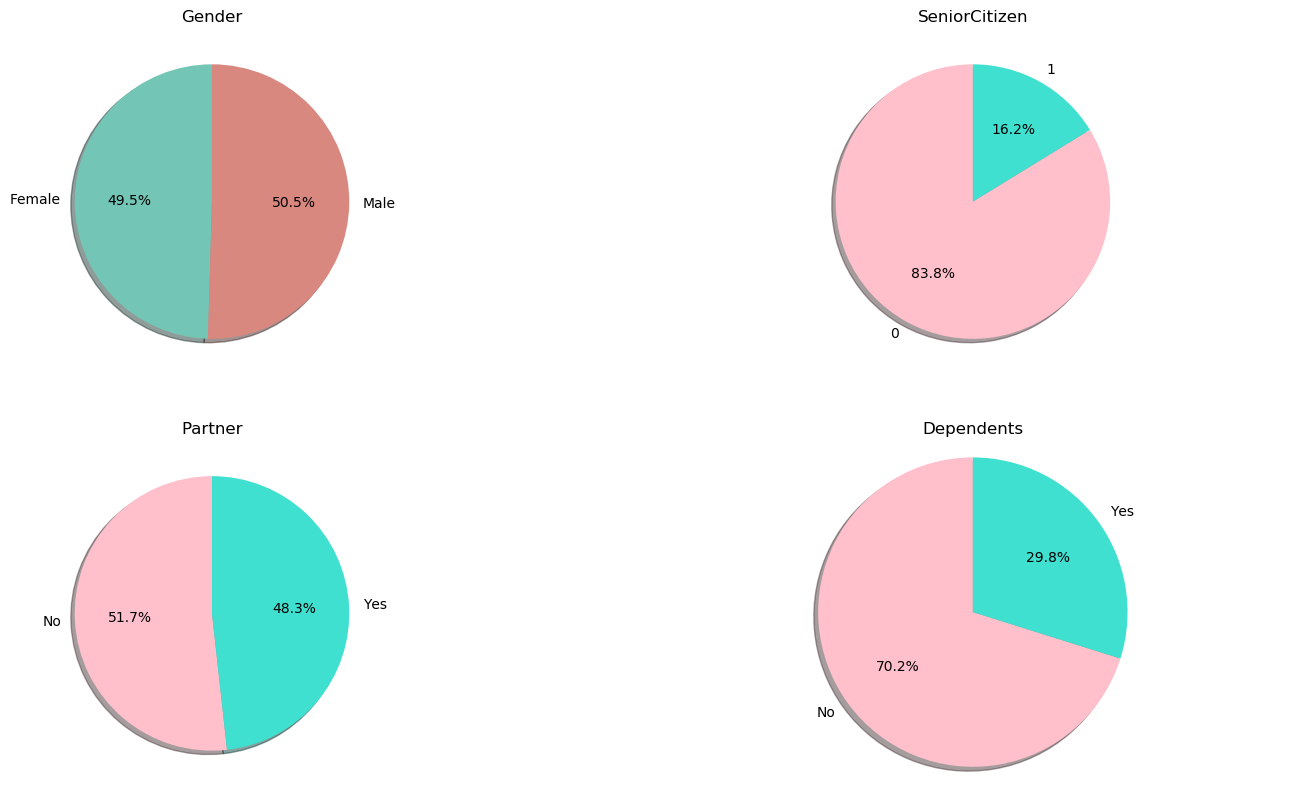

In [28]:
fig = plt.figure(figsize=(18,10), dpi=100)

labels= ['Female','Male']
size= [3483,3549]
colors= ['#73C6B6', '#D98880']

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(size, labels=labels, colors= colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender')

#plt.axis('equal')
#plt.show()
#############################################

labels= ['0','1']
size= [5890,1142]
colors= ['pink', 'turquoise']

ax2 = plt.subplot2grid((2,2),(0,1))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('SeniorCitizen')
#####################################################

labels= ['No','Yes']
size= [3639,3393]
color= ['red', 'blue']

ax3 = plt.subplot2grid((2,2),(1,0))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Partner')
###################################################################

labels= ['No','Yes']
size= [4933,2099]
color= ['red', 'blue']

ax4 = plt.subplot2grid((2,2),(1,1))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Dependents')



plt.axis('equal')
plt.show()

### Contract

There are 3 types of contract a customer can have and the following graph shows that most of the customers have the month to month contract. Followed by 2 years and then 1 year contract. 

The second graph shows distribution of contract along the months(tenure). Interestingly most of the monthly contracts last for 1-4 months, while the 2 year contracts tend to last for about 70 months before the customer starts churing. 
This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

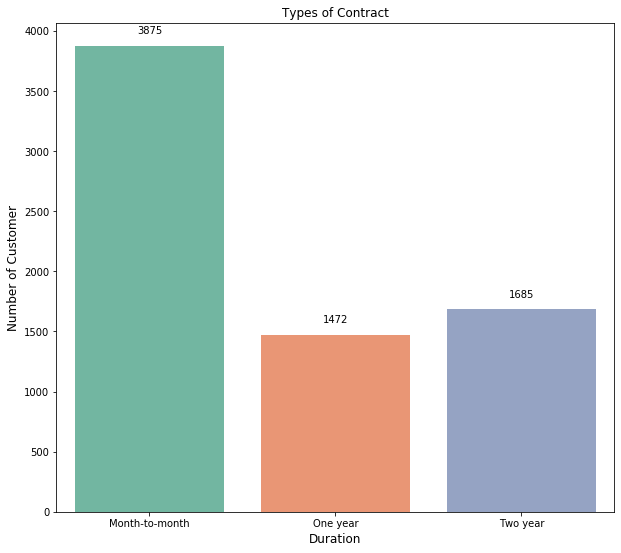

In [29]:
plt.figure(figsize=(10,9))
c= sns.countplot(data['Contract'], palette= 'Set2')
plt.title('Types of Contract')
plt.ylabel('Number of Customer', fontsize=12)
plt.xlabel('Duration', fontsize=12)

for p in c.patches:
    c.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')

Text(0.5, 1.0, 'Two Year Contract')

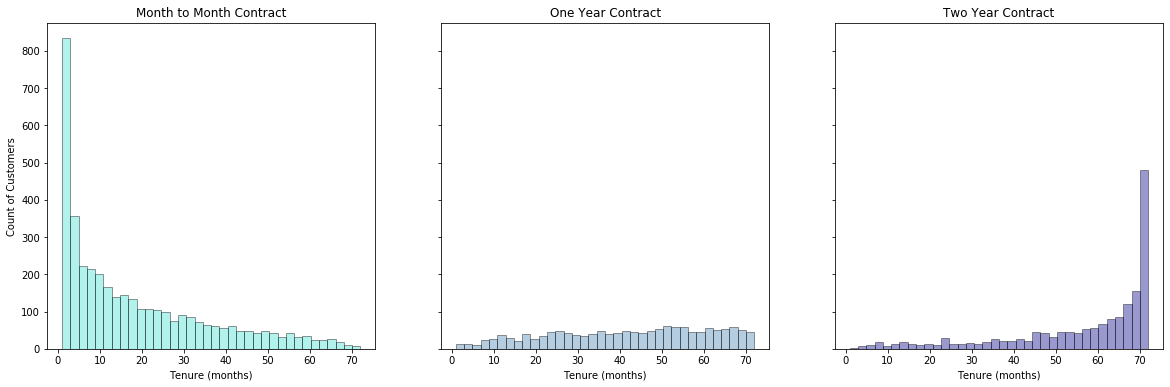

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Count of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

### Correlation Matrix

Out of 21 columns there are only three numerical columns: tenure, monthly charges and total charges. Through this correlation matrix we can see that tenure and total charges are highly correlated.



(3.5, -0.5)

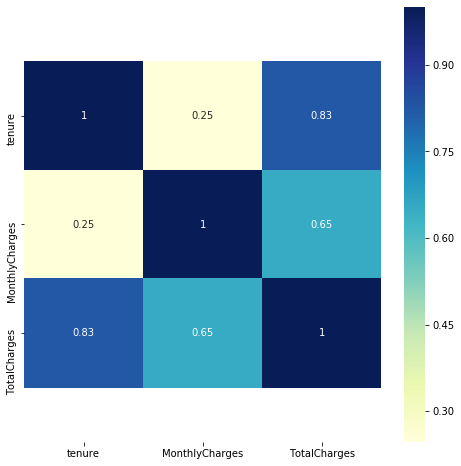

In [31]:
plt.figure(figsize=(8,8))
data_corr = data.drop(['SeniorCitizen','churn_rate'], axis=1).corr()
ax = sns.heatmap(data_corr, annot=True, cmap="YlGnBu") #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### From the plots we can conclude that:
There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimated using the seaborn kdeplot function.

1. Recent clients are more likely to churn
2. Clients with higher MonthlyCharges are also more likely to churn
3. Tenure and MonthlyCharges are probably important features

Text(0, 0.5, 'Frequency')

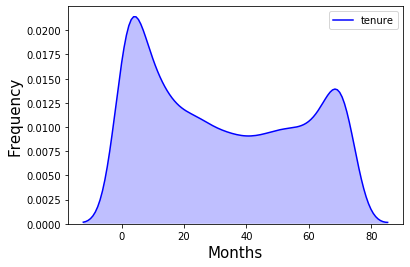

In [32]:
sns.kdeplot(data["tenure"], shade=True, color="blue")

plt.xlabel('Months', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


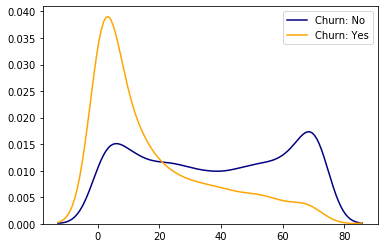

In [33]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['tenure'].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'].dropna(), color= 'orange', label= 'Churn: Yes')

Text(0, 0.5, 'Frequency')

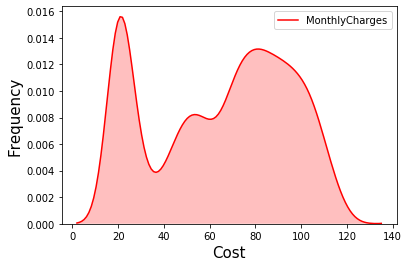

In [34]:
sns.kdeplot(data["MonthlyCharges"], shade=True, color="red")

plt.xlabel('Cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


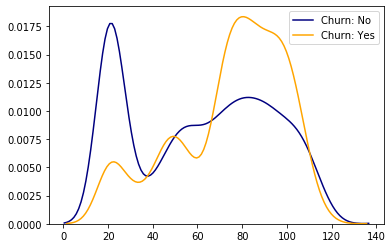

In [35]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color= 'orange', label= 'Churn: Yes')

Text(0, 0.5, 'Frequency')

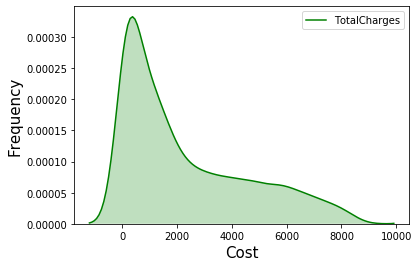

In [36]:
sns.kdeplot(data["TotalCharges"], shade=True, color="green")

plt.xlabel('Cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


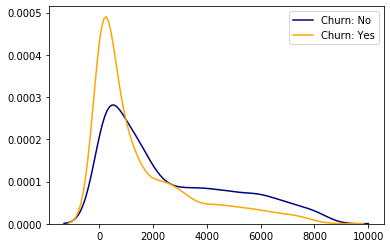

In [37]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['TotalCharges'].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['TotalCharges'].dropna(), color= 'orange', label= 'Churn: Yes')

### Additional Service

Additional services include <b>Online Security, Online Backup, Device Protection, Tech Support, Streaming TV</b> and <b>Streaming Movies</b>. The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can observe that:

1. Customers with the first 4 additionals (security to tech support) are less likely to churn
2. Streaming service is not predictive for churn

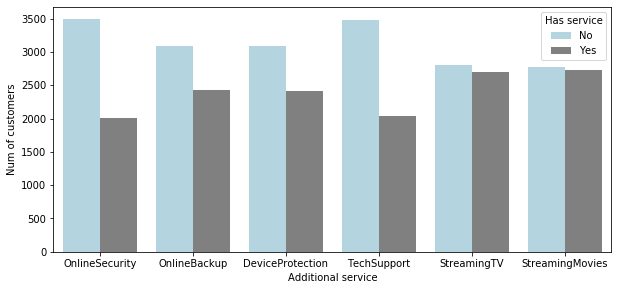

In [38]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()


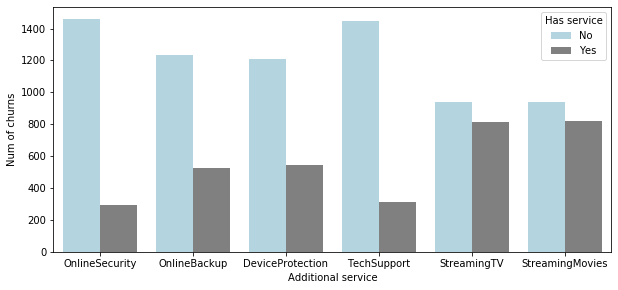

In [39]:
plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

## Machine Learning

Now that we are done with the data analysis and identified the trends in the dataset, we will do the machine learning to build a model which will actually predict if the customer is churning or not. 

In [40]:
# data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)

data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

data2 = data.drop('customerID', axis = 1)
data2 = data2.drop(['churn_rate'], axis = 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


In [42]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

data2 = pd.get_dummies(data2)

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


In [43]:
X = data2.drop('Churn', axis=1)

y = data2['Churn']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### Data Seperation

Seperating the data with 80% training and 20% testing.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

## Logistic Regression

Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable (as we have 2 possible outcomes - either churining or not churning). 

In [46]:
accuracy= {}

log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

/Users/ajinkyadande/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [48]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.7860696517412935
Accuracy score for train data : 0.808


In [49]:
accuracy['LogisticRegression']= round(log.score(X_test,y_test)*100,2)

## Suppoer Vector Machine (SVM)

In the case of SVM, a data point is viewed as a p-dimensional vector (a list of p numbers), and we want to know whether we can separate all points in the dataset with two (p-1)-dimensional hyperplanes. We will choose the hyperplanes that represents the largest separation, or margin, between the two classes. 

In [50]:
svc = SVC()
svc.fit(X_train, y_train)

/Users/ajinkyadande/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [52]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.7704335465529495
Accuracy score for train data : 0.9095111111111112


### SVM with Standard Scaler

Above the accuracy provided by SVM is 77%, we will Standardize the dataset and see if the accuracy changes. After standard scaler the percent of accuracy increased by 2% making it 78%

In [53]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [54]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

accuracy['SVM']= round(svc_sc_as*100,2)

In [55]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.783226723525231
Accuracy score for train data : 0.8202666666666667


## KNN

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. In this algorithm, for the purpose of classification we identify k points near the target, and assign it the value of the majority of those points. On this dataset, the optimum value of k is observed to be 6 as represented in the graph below.

In [57]:
testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

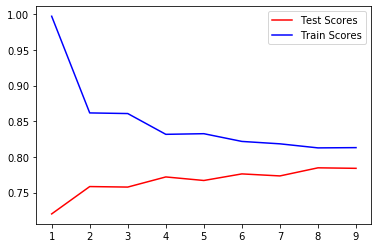

In [58]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

In [59]:
knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [60]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [61]:
accuracy['KNN']= round(knn.score(X_test,y_test)*100,2)

In [62]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.7761194029850746
Accuracy score for train data : 0.8216888888888889


## Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a customer is senior citizen or not), each branch represents the outcome of the test, and each leaf node represents a class label (weather the customer is churning or not).

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [64]:
accuracy['Decision Tree ']= round(decision_tree.score(X_test,y_test)*100,2)

In [65]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7228144989339019
Accuracy score for train data : 0.9976888888888888


## Random Forest

Random forests or random decision forests are an ensemble learning method for prediction that operate by constructing a multitude of decision trees at training time and outputting the label that is the mode of the prediction labels of the individual trees.

In [66]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

/Users/ajinkyadande/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
accuracy[' Random Forest']= round(random_forest.score(X_test,y_test)*100,2)

In [68]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.7690120824449183
Accuracy score for train data : 0.9809777777777777


## Final Graph
The final graph of this project is the comparison of the different Machine learning models used. It shows that Logistic Regression performed the best with 78.6% accuaracy on this particular dataset. 

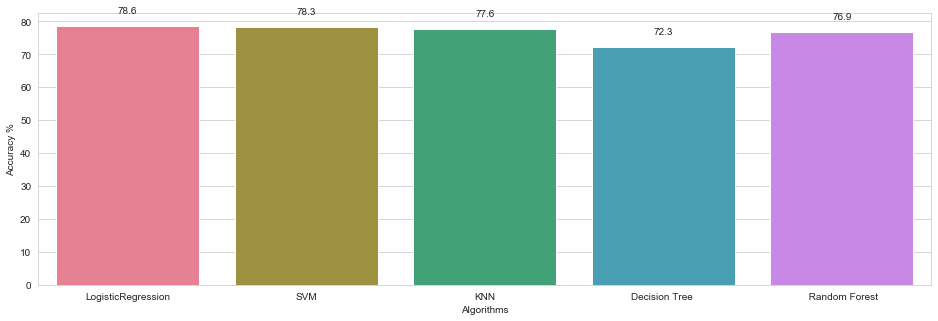

In [69]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
we= sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='husl')
# plt.show()
for p in we.patches:
    we.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')
